In [24]:
import os
import pandas as pd
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set()

In [25]:
d, m, y = '01', '03', '2024'

In [26]:
path = '/mnt/data/marcos/data/SUNT/sunt/'

In [27]:
path_out = f'{path}{y}-{m}-{d}/output/'

## OD

In [52]:
od = pd.read_csv(f'{path_out}sobe_desce_{d}-{m}-{y}_esp.csv')
od.head()

/home/marcos/.pyenv/versions/3.9.1/envs/yolov7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,route_short_name,register_code,direction_id,pt_sequence,stop_id,vehicle,trip_number,trip_id,start_trip,end_trip,stop_time,n-boardings,lag_loading,n-alighting,balance,loading
0,1141,12730,I,1,44028970,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:07:50,8.0,0.0,0.0,0.0,8.0
1,1141,12730,I,2,44783401,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:07:52,5.0,8.0,0.0,8.0,13.0
2,1141,12730,I,3,44783402,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:08:49,5.0,13.0,0.0,13.0,18.0
3,1141,12730,I,4,45833865,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:10:12,6.0,18.0,0.0,18.0,24.0
4,1141,12730,I,5,44739642,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:11:26,6.0,24.0,0.0,24.0,30.0


In [53]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739266 entries, 0 to 739265
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   route_short_name  739266 non-null  object 
 1   register_code     739266 non-null  int64  
 2   direction_id      739266 non-null  object 
 3   pt_sequence       739266 non-null  int64  
 4   stop_id           739266 non-null  int64  
 5   vehicle           739266 non-null  int64  
 6   trip_number       739266 non-null  int64  
 7   trip_id           739266 non-null  object 
 8   start_trip        739266 non-null  object 
 9   end_trip          739266 non-null  object 
 10  stop_time         739266 non-null  object 
 11  n-boardings       739266 non-null  float64
 12  lag_loading       739266 non-null  float64
 13  n-alighting       739266 non-null  float64
 14  balance           739266 non-null  float64
 15  loading           739266 non-null  float64
dtypes: float64(5), int64

In [54]:
df = od.copy()

### Basic Statistics

In [55]:
# List of columns to calculate statistics
od_columns = ['n-boardings', 'lag_loading', 'n-alighting', 'balance', 'loading']

estatisticas = {}

for coluna in od_columns:
    estatisticas[coluna] = {
        'Count': df[coluna].count(),
        'Mean': df[coluna].mean(),
        'Std': df[coluna].std(),
        'Min': df[coluna].min(),
        '25%': df[coluna].quantile(0.25),
        '50%': df[coluna].median(),
        '75%': df[coluna].quantile(0.75),
        'Max': df[coluna].max(),
        'Unique values': df[coluna].nunique(),
        'Valor Mais Frequente': df[coluna].mode()[0] if not df[coluna].mode().empty else 'Nenhum',
        'Valores Ausentes': df[coluna].isnull().sum()
    }

estatisticas_df = pd.DataFrame(estatisticas).T

print(estatisticas_df)

                Count       Mean        Std  Min       25%        50%  \
n-boardings  739266.0   1.367928   4.086839  0.0  0.000000   0.000000   
lag_loading  739266.0  20.284383  18.438119  0.0  6.000000  15.631166   
n-alighting  739266.0   0.984607   2.500622  0.0  0.000000   0.000000   
balance      739266.0  19.299776  17.842118  0.0  5.544271  14.674401   
loading      739266.0  20.667704  18.285248  0.0  6.682673  16.000000   

                   75%         Max  Unique values  Valor Mais Frequente  \
n-boardings   1.000000  264.000000          133.0                   0.0   
lag_loading  29.482177  264.000000       233283.0                   0.0   
n-alighting   1.213018   85.470199       156750.0                   0.0   
balance      28.000000  264.000000       250389.0                   0.0   
loading      29.745455  264.000000       246457.0                   0.0   

             Valores Ausentes  
n-boardings               0.0  
lag_loading               0.0  
n-alighting   

In [56]:
estatisticas_df.head()

,Count,Mean,Std,Min,25%,50%,75%,Max,Unique values,Valor Mais Frequente,Valores Ausentes
n-boardings,739266.0,1.367928,4.086839,0.0,0.000000,0.000000,1.000000,264.000000,133.0,0.0,0.0
lag_loading,739266.0,20.284383,18.438119,0.0,6.000000,15.631166,29.482177,264.000000,233283.0,0.0,0.0
n-alighting,739266.0,0.984607,2.500622,0.0,0.000000,0.000000,1.213018,85.470199,156750.0,0.0,0.0
balance,739266.0,19.299776,17.842118,0.0,5.544271,14.674401,28.000000,264.000000,250389.0,0.0,0.0
loading,739266.0,20.667704,18.285248,0.0,6.682673,16.000000,29.745455,264.000000,246457.0,0.0,0.0


### BoxPlot

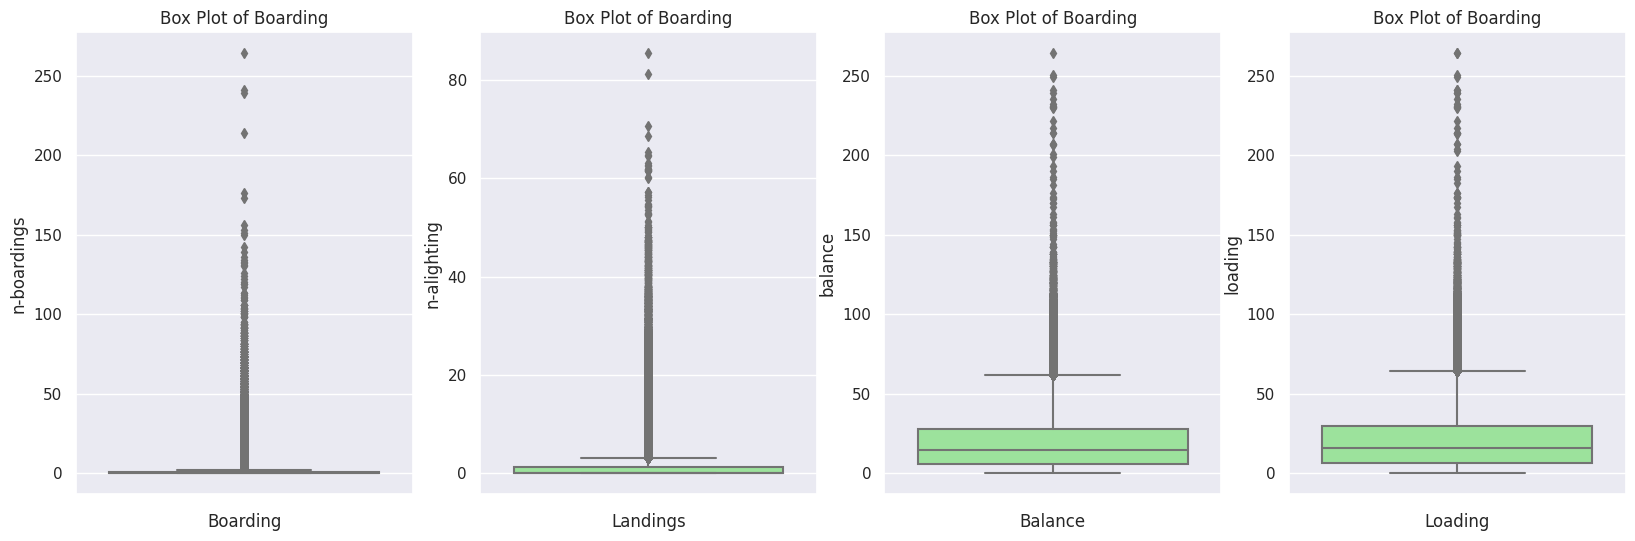

In [57]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

sns.boxplot(y=df['n-boardings'], color='lightgreen', ax=axs[0])
sns.boxplot(y=df['n-alighting'], color='lightgreen', ax=axs[1])
sns.boxplot(y=df['balance'], color='lightgreen', ax=axs[2])
sns.boxplot(y=df['loading'], color='lightgreen', ax=axs[3])

axs[0].set_title('Box Plot of Boarding')
axs[0].set_xlabel('Boarding')

axs[1].set_title('Box Plot of Boarding')
axs[1].set_xlabel('Landings')

axs[2].set_title('Box Plot of Boarding')
axs[2].set_xlabel('Balance')

axs[3].set_title('Box Plot of Boarding')
axs[3].set_xlabel('Loading')

# Show the plot
plt.show()

### Histogram

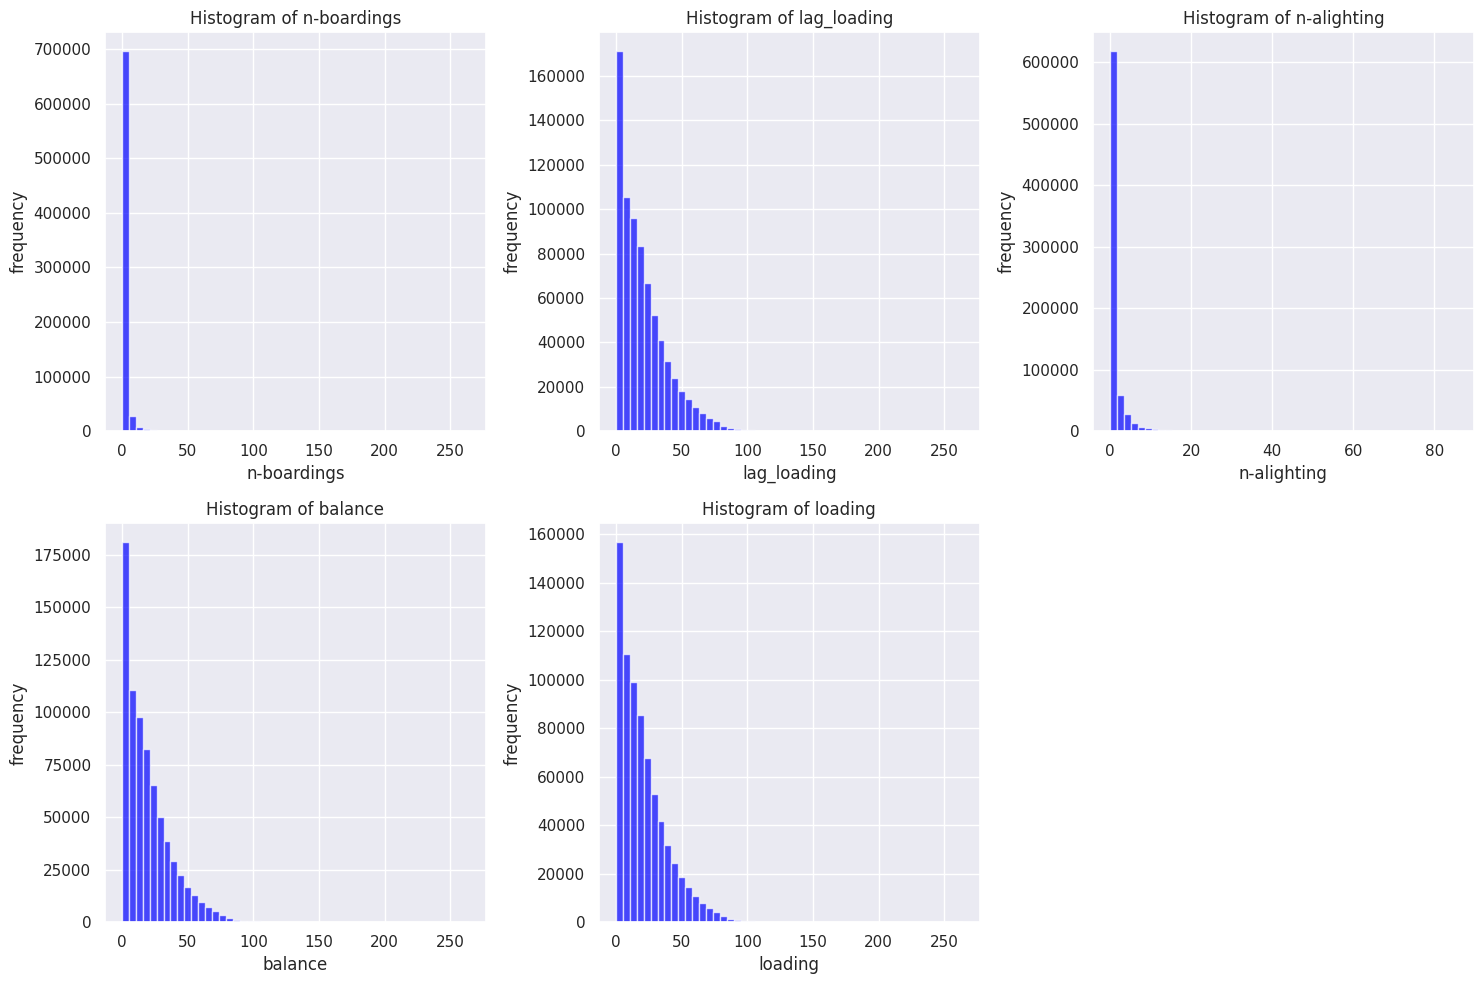

In [58]:
# Lista de colunas para plotar os histogramas
colunas = ['n-boardings', 'lag_loading', 'n-alighting', 'balance', 'loading']

# Configurar o tamanho das figuras
plt.figure(figsize=(15, 10))

# Plotar um histograma para cada coluna
for i, coluna in enumerate(colunas, 1):
    plt.subplot(2, 3, i)  # Organiza os gráficos em uma grade de 2 linhas e 3 colunas
    df[coluna].hist(bins=50, color='blue', alpha=0.7)
    plt.title(f'Histogram of {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('frequency')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

### Violinplot

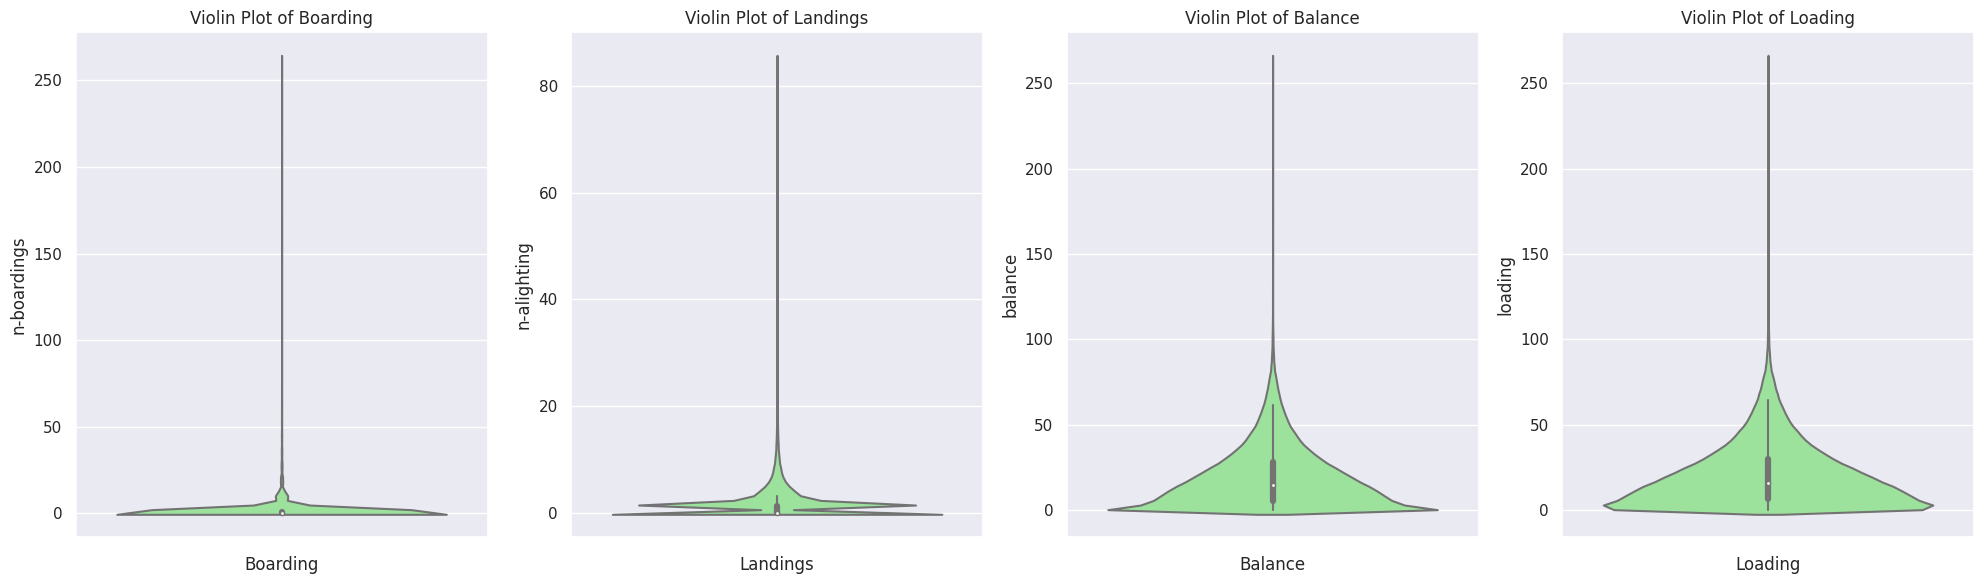

In [60]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Criar violin plots para cada variável
sns.violinplot(y=df['n-boardings'], color='lightgreen', ax=axs[0])
sns.violinplot(y=df['n-alighting'], color='lightgreen', ax=axs[1])
sns.violinplot(y=df['balance'], color='lightgreen', ax=axs[2])
sns.violinplot(y=df['loading'], color='lightgreen', ax=axs[3])

# Ajustar títulos e rótulos dos subplots
axs[0].set_title('Violin Plot of Boarding')
axs[0].set_xlabel('Boarding')

axs[1].set_title('Violin Plot of Landings')
axs[1].set_xlabel('Landings')

axs[2].set_title('Violin Plot of Balance')
axs[2].set_xlabel('Balance')

axs[3].set_title('Violin Plot of Loading')
axs[3].set_xlabel('Loading')

# Mostrar o plot
plt.tight_layout()
plt.show()

## Trip Time Series

In [61]:
tts = pd.read_parquet(f'{path_out}trips_time-series_{d}-{m}-{y}_{d}-{m}-{y}.parquet')
tts.head()

,linha_atend,linha,cod_ate,sentido,shape,ordem,stop_id,lat,lon,distancias,acumulado,posicao,veiculo,trip,trip_id,inicio_viagem,fim_viagem,set,hora_ponto,saida,fill,tempo_parada,duracao,tempo_total,tempo_parada_acum,duracao_acum,distancia,dis_acum,vm,vm_acum,type
0,123101_57892,123101,57892,I,57892_I,1,44782944,-12.942813,-38.438602,0.000,0.000,inicial,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:30:58,2024-03-01 05:30:58,False,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,bus
1,123101_57892,123101,57892,I,57892_I,2,44784618,-12.939712,-38.438862,0.449,0.449,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:32:18,2024-03-01 05:32:25,False,7.0,80.0,87.0,7.0,80.0,0.345999,0.000000,15.569937,0.000000,bus
2,123101_57892,123101,57892,I,57892_I,3,44784340,-12.938302,-38.439884,0.126,0.575,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:32:46,2024-03-01 05:33:22,False,36.0,21.0,57.0,43.0,101.0,0.191938,0.345999,32.903659,12.332624,bus
3,123101_57892,123101,57892,I,57892_I,4,44782337,-12.935150,-38.440578,0.523,1.098,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:35:31,2024-03-01 05:36:03,False,32.0,129.0,161.0,75.0,230.0,0.358460,0.537937,10.003548,8.419877,bus
4,123101_57892,123101,57892,I,57892_I,5,44784470,-12.937017,-38.437576,0.417,1.515,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:36:50,2024-03-01 05:37:07,False,17.0,47.0,64.0,92.0,277.0,0.385962,0.896397,29.563075,11.649926,bus


### Basic Statistics

In [62]:
df = tts.copy()

In [63]:
# List of columns to calculate statistics
tts_columns = ['distancias', 'acumulado', 'tempo_total', 'tempo_parada_acum', 'duracao_acum','dis_acum', 'vm_acum']

estatisticas = {}

for coluna in tts_columns:
    estatisticas[coluna] = {
        'Count': df[coluna].count(),
        'Mean': df[coluna].mean(),
        'Std': df[coluna].std(),
        'Min': df[coluna].min(),
        '25%': df[coluna].quantile(0.25),
        '50%': df[coluna].median(),
        '75%': df[coluna].quantile(0.75),
        'Max': df[coluna].max(),
        'Unique values': df[coluna].nunique(),
        'Valor Mais Frequente': df[coluna].mode()[0] if not df[coluna].mode().empty else 'Nenhum',
        'Valores Ausentes': df[coluna].isnull().sum()
    }

estatisticas_df = pd.DataFrame(estatisticas).T

print(estatisticas_df)

                      Count         Mean          Std           Min  \
distancias         739370.0     0.458322     0.471522  0.000000e+00   
acumulado          739370.0     9.901982     8.032221  0.000000e+00   
tempo_total        739370.0    85.453017    89.147094 -5.382222e+03   
tempo_parada_acum  739370.0   448.724146   400.952743  0.000000e+00   
duracao_acum       739370.0  1379.670805  1172.053651 -5.236222e+03   
dis_acum           739370.0     7.942860     6.938332  0.000000e+00   
vm_acum            739045.0          inf          NaN -5.024874e+17   

                          25%          50%          75%          Max  \
distancias           0.251000     0.367000     0.546000    23.758000   
acumulado            3.382000     7.946000    14.781000    40.506000   
tempo_total         41.000000    66.000000   104.000000  5590.000000   
tempo_parada_acum  137.000000   344.000000   660.000000  6027.000000   
duracao_acum       447.000000  1083.000000  2038.000000  9281.999999   

### BoxPlot

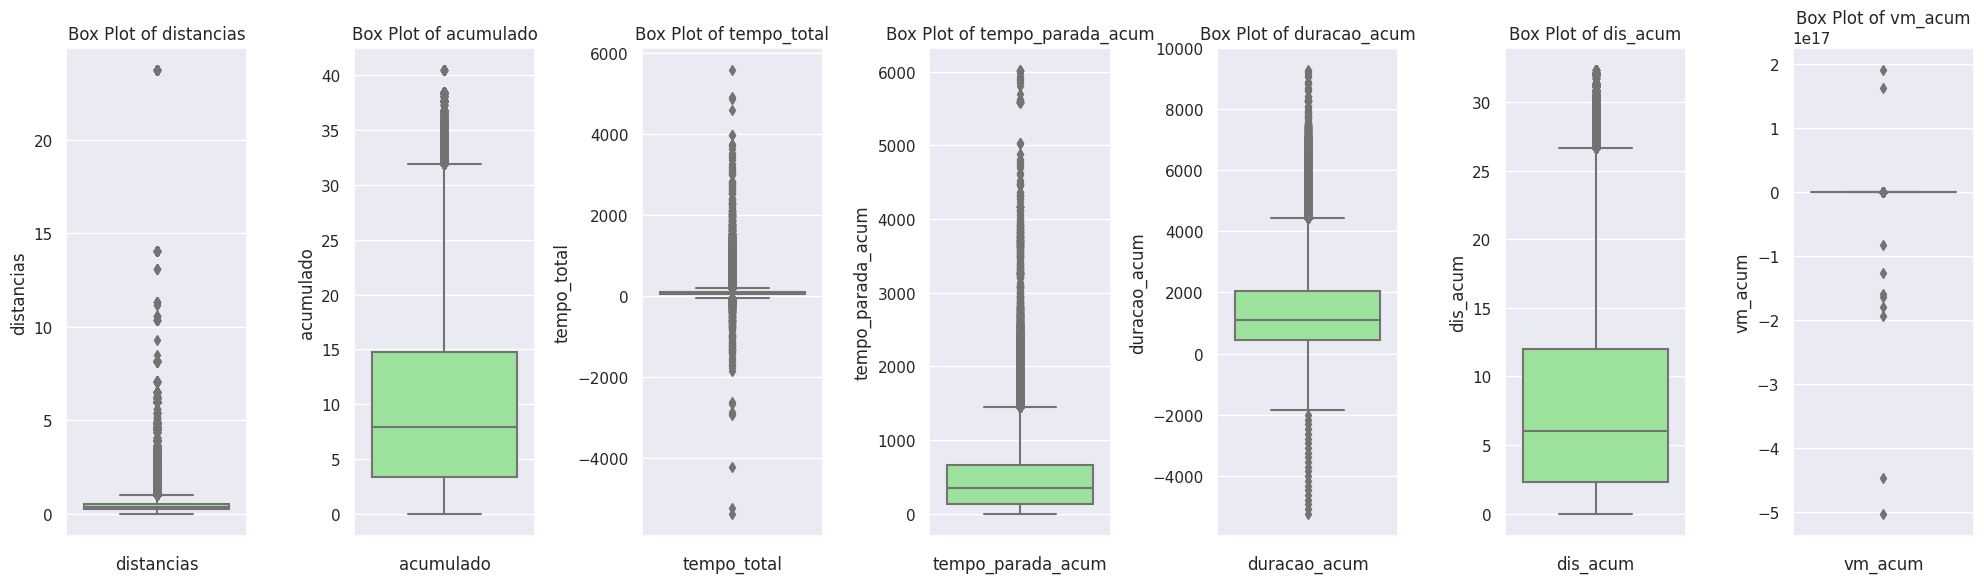

In [49]:
# Definir as colunas para os plots
tts_columns = ['distancias', 'acumulado', 'tempo_total', 'tempo_parada_acum', 'duracao_acum', 'dis_acum', 'vm_acum']

# Número de colunas a serem plotadas por vez
cols_to_plot = 7

# Criar subplots
fig, axs = plt.subplots(1, cols_to_plot, figsize=(20, 6))

# Plotar os box plots para as primeiras 4 colunas em tts_columns
for i in range(cols_to_plot):
    sns.boxplot(y=df[tts_columns[i]], color='lightgreen', ax=axs[i])
    axs[i].set_title(f'Box Plot of {tts_columns[i]}')
    axs[i].set_xlabel(tts_columns[i])

# Ajustar layout
plt.tight_layout()

# Mostrar o plot
plt.show()

### Violon Plot

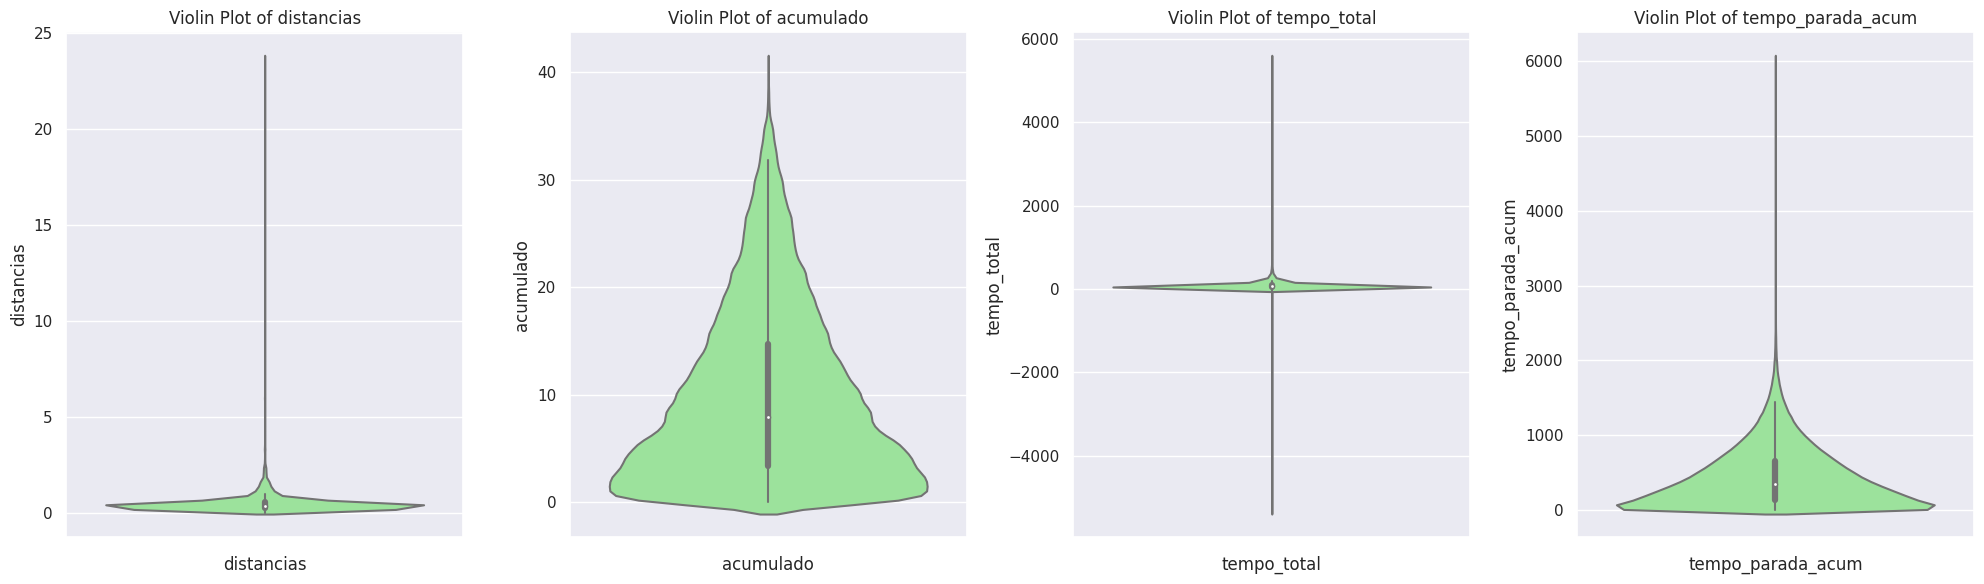

In [64]:
# Definir as colunas para os plots
tts_columns = ['distancias', 'acumulado', 'tempo_total', 'tempo_parada_acum', 'duracao_acum', 'dis_acum', 'vm_acum']

# Número de colunas a serem plotadas por vez
cols_to_plot = 4

# Criar subplots
fig, axs = plt.subplots(1, cols_to_plot, figsize=(20, 6))

# Plotar os violin plots para as primeiras 4 colunas em tts_columns
for i in range(cols_to_plot):
    sns.violinplot(y=df[tts_columns[i]], color='lightgreen', ax=axs[i])
    axs[i].set_title(f'Violin Plot of {tts_columns[i]}')
    axs[i].set_xlabel(tts_columns[i])

# Ajustar layout
plt.tight_layout()

# Mostrar o plot
plt.show()

### Histogram

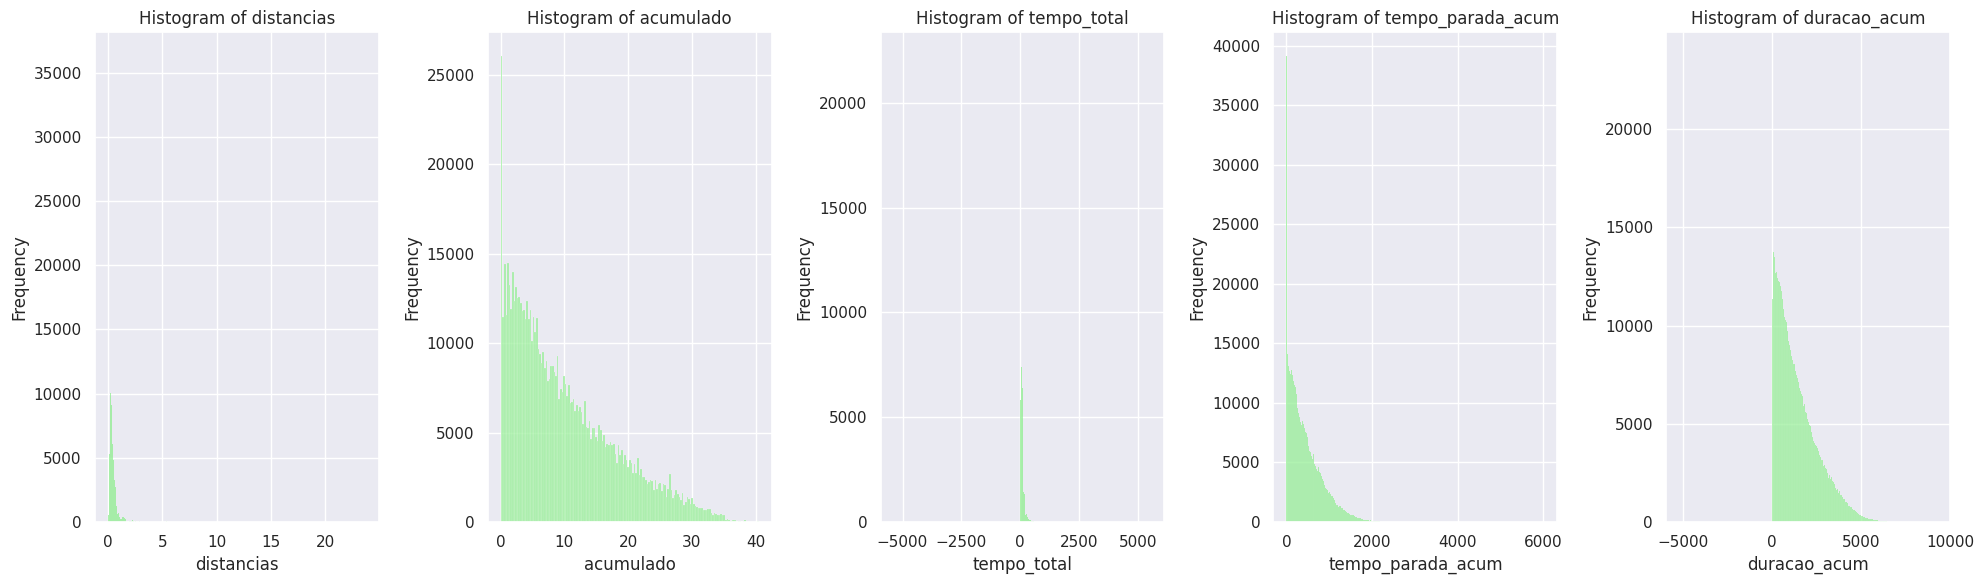

In [66]:
cols_to_plot = 5

# Criar subplots
fig, axs = plt.subplots(1, cols_to_plot, figsize=(20, 6))

# Plotar os histogramas para as primeiras 4 colunas em tts_columns
for i in range(cols_to_plot):
    sns.histplot(df[tts_columns[i]], kde=False, color='lightgreen', ax=axs[i])
    axs[i].set_title(f'Histogram of {tts_columns[i]}')
    axs[i].set_xlabel(tts_columns[i])
    axs[i].set_ylabel('Frequency')

# Ajustar layout
plt.tight_layout()

# Mostrar o plot
plt.show()